In [1]:
%matplotlib inline  

import spacy
import os
import numpy
from matplotlib import pyplot as plt
from statistics import mean, median

In [2]:
nlp = spacy.load('en_core_web_lg')

In [3]:
def polarity_good_vs_bad(word):
    """Returns a positive number if a word is closer to good than it is to bad, or a negative number if vice versa
    IN: word (str): the word to compare
    OUT: diff (float): positive if the word is closer to good, otherwise negative
    """

    good = nlp("good")
    bad = nlp("bad")
    word = nlp(word)
    if word and word.vector_norm:
        sim_good = word.similarity(good)
        sim_bad = word.similarity(bad)
        diff = sim_good - sim_bad
        diff = round(diff * 100, 2)
        return diff
    else:
        return None

In [4]:
review_dataset_dir = "../Data/aclImdb/train"

pos_scores = []
neg_scores = []

LIMIT = 2000

for pol in ("pos", "neg"):
    review_files = os.listdir(os.path.join(review_dataset_dir, pol))
    review_files = review_files[:LIMIT]
    print("Processing {} review files".format(len(review_files)))
    for i, rf in enumerate(review_files):
        with open(os.path.join(review_dataset_dir, os.path.join(pol,rf)), encoding ="utf-8") as f:
            s = f.read()
            score = polarity_good_vs_bad(s)
            if pol == "pos":
                pos_scores.append(score)
            elif pol == "neg":
                neg_scores.append(score)

Processing 2000 review files
Processing 2000 review files


In [5]:
mean_pos = mean(pos_scores)
mean_neg = mean(neg_scores)
med_pos = median(pos_scores)
med_neg = median(neg_scores)

print(f"Mean polarity score of positive reviews: {mean_pos}")
print(f"Mean polarity score of negative reviews: {mean_neg}")
print(f"Median polarity score of positive reviews: {med_pos}")
print(f"Median polarity score of negative reviews: {med_neg}")

Mean polarity score of positive reviews: 4.90824
Mean polarity score of negative reviews: 3.220575
Median polarity score of positive reviews: 4.84
Median polarity score of negative reviews: 3.29


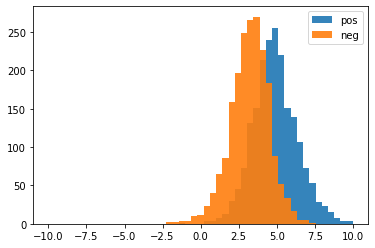

In [6]:
bins = numpy.linspace(-10.0, 10.0, 50)

plt.hist(pos_scores, bins, alpha=0.9, label='pos')
plt.hist(neg_scores, bins, alpha=0.9, label='neg')
plt.legend(loc='upper right')

plt.show()

In [7]:
phrases = [
    "the movie was good",
    "the movie was not good",
    "good",
    "not",
    "the movie was very good",
    "the movie was very very good",
    "the movie was bad",
    "the movie was very very very bad"  
]

for phrase in phrases:
    print(phrase, polarity_good_vs_bad(phrase))

the movie was good 8.14
the movie was not good 6.78
good 26.45
not 0.33
the movie was very good 11.35
the movie was very very good 13.27
the movie was bad -8.47
the movie was very very very bad 5.31
